<a href="https://colab.research.google.com/github/jamalromero/colab/blob/main/udl_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Keep Python runtime and install java

In [ ]:
!apt install openjdk-17-jdk

Install Juyter Java kernel

In [ ]:
!pip install jbang
import jbang
jbang.exec("trust add https://github.com/jupyter-java")
jbang.exec("install-kernel@jupyter-java")

Change Runtime to Java kernel and test Java runtime.

In [ ]:
System.getProperty("java.version")

Load external script to include maven dependency, import packages and intial startup script. Example:

```
%%loadFromPOM
<dependency>
    <groupId>tech.tablesaw</groupId>
    <artifactId>tablesaw-core</artifactId>
    <version>0.43.1</version>
</dependency>

import java.util.stream.*;

System.getProperty("java.version");

```



In [ ]:
%load /content/drive/MyDrive/colab/init_script.ipynb

In [314]:
NDManager manager = NDManager.newBaseManager();

# Shallow neural networks I
The purpose of this notebook is to gain some familiarity with shallow neural networks with 1D inputs. It works through an example similar to figure 3.3 and experiments with different activation functions.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.


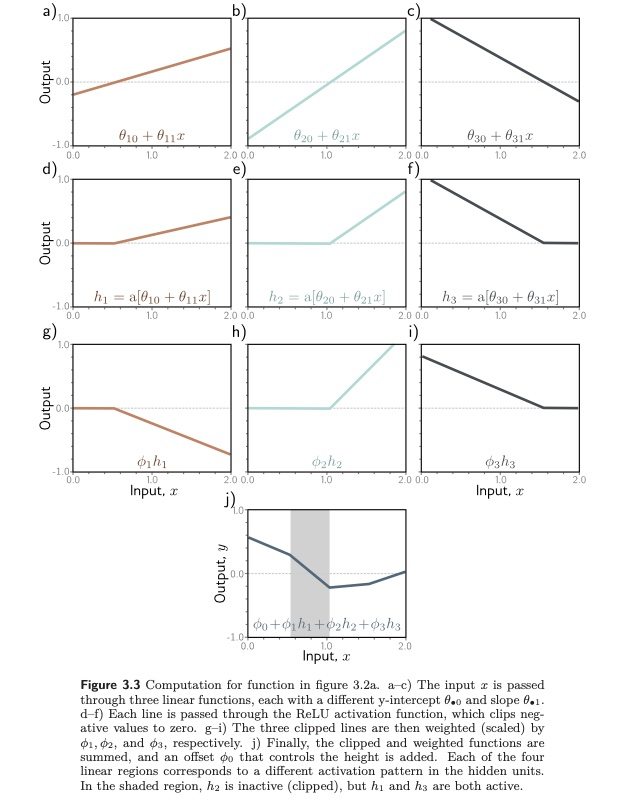

In [23]:
//Define the Rectified Linear Unit (ReLU) function
NDArray relu(NDArray preactivation) {
  return preactivation.maximum(0);
}

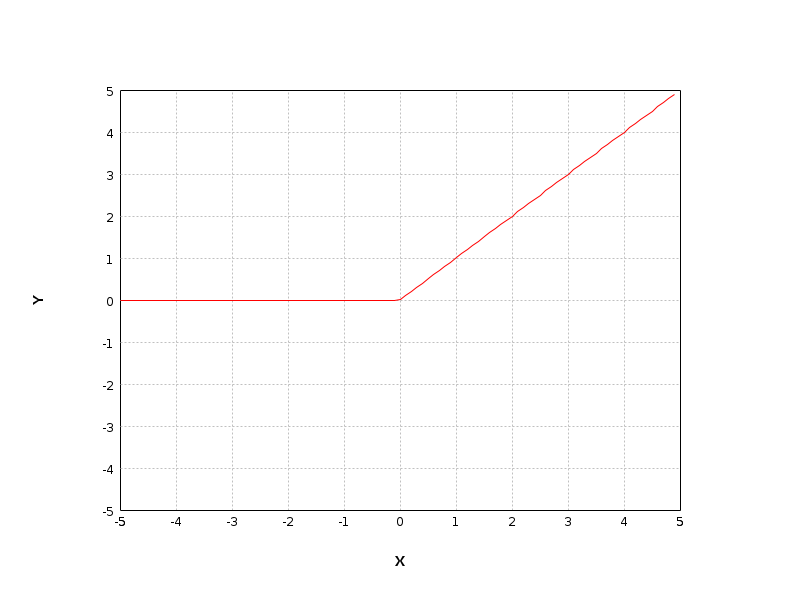

In [356]:
// Make an array of inputs
NDArray inputs = manager.arange(-5f, 5f, 0.1f).toType(DataType.FLOAT64, true);
NDArray outputs = relu(inputs);

// Plot the Relu function
var canvas = LinePlot.of(toDoubleArray(inputs.stack(outputs, 1)), Color.RED).canvas();
canvas.setBound(new double[]{-5, -5}, new double[]{5, 5});
canvas.toBufferedImage(800, 600)

### Define a shallow neural network with, one input, one output, and three hidden units
Hidden units:
\begin{equation}h_1 = \theta_{10} + \theta_{11}x\end{equation}
\begin{equation}h_2 = \theta_{20} + \theta_{21}x\end{equation}
\begin{equation}h_2 = \theta_{30} + \theta_{31}x\end{equation}

Then combine the hidden units with a linear function:
\begin{equation}y = \phi_0 + \phi_1 h_1 + \phi_2 h_2 + \phi_3 h_3\end{equation}